### Clustering for number of passengers and flights

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [23]:
df= pd.read_csv("air-traffic-passenger-statistics.csv")

In [24]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [26]:
df.shape

(18885, 12)

In [27]:
df.corr()

,Activity Period,Passenger Count
Activity Period,1.000000,0.050677
Passenger Count,0.050677,1.000000


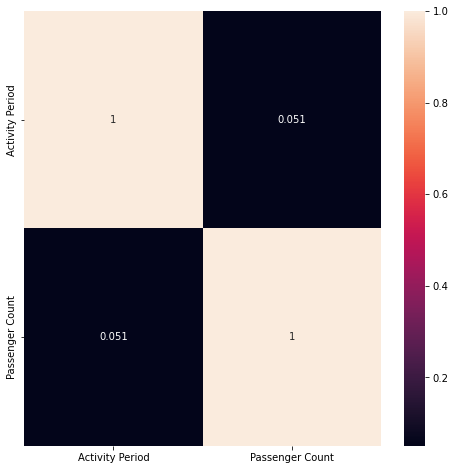

In [28]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True);

In [7]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [11]:
# We need to clean the null columns-IATA codes
not_null=pd.notnull(df["Operating Airline IATA Code"])
df=df[not_null]

In [30]:
df.shape

(18885, 12)

In [31]:
# We need to seperate date to the month and year then delete the activity period
df["Activity Month"]=df["Activity Period"].astype(str).str[4:]
df["Activity Year"]=df["Activity Period"].astype(str).str[:4]
df["Activity Month"]=df["Activity Month"].astype(int)
df["Activity Year"]=df["Activity Year"].astype(int)
del df["Activity Period"]

In [32]:
df.tail()

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Activity Month,Activity Year
18880,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50,6,2018
18881,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868,6,2018
18882,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664,6,2018
18883,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804,6,2018
18884,XL Airways France,SE,XL Airways France,SE,International,Europe,Enplaned,Other,International,A,1243,6,2018


In [33]:
df.corr()

,Passenger Count,Activity Month,Activity Year
Passenger Count,1.000000,0.014507,0.050497
Activity Month,0.014507,1.000000,-0.118555
Activity Year,0.050497,-0.118555,1.000000


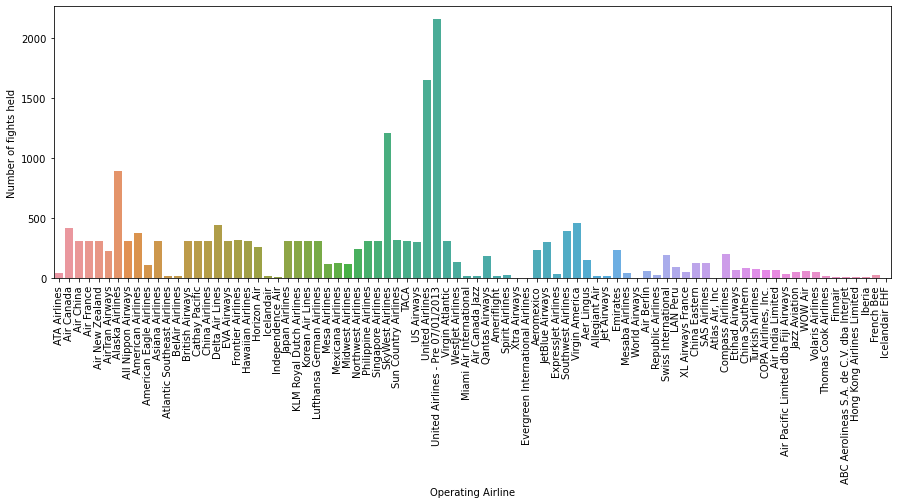

In [15]:
plt.figure(figsize=(15,5))
sns.countplot("Operating Airline",data=df);
plt.xticks(rotation=90);
plt.ylabel("Number of fights held");

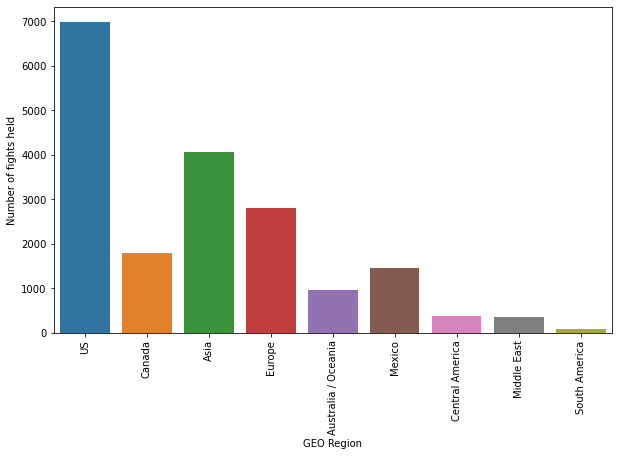

In [36]:
plt.figure(figsize=(10,6))
sns.countplot("GEO Region",data=df);
plt.xticks(rotation=90);
plt.ylabel("Number of fights held");

In [37]:
flight_count=df["Operating Airline"].value_counts() #flight numbers of airlines companies

In [38]:
flight_count

United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
Xtra Airways                           2
Evergreen International Airlines       2
Pacific Aviation                       2
Icelandair EHF                         2
Boeing Company                         1
Name: Operating Airline, Length: 89, dtype: int64

In [45]:
passenger_count=df.groupby(df["Operating Airline"]).sum()["Passenger Count"].sort_values(ascending=False)

In [47]:
list_group=pd.DataFrame(passenger_count)
list_group.head(8)

,Passenger Count
Operating Airline,
United Airlines,112640408
United Airlines - Pre 07/01/2013,105363917
SkyWest Airlines,44582356
American Airlines,43622387
Virgin America,37843920
Delta Air Lines,34813833
Southwest Airlines,33414970
Alaska Airlines,17540235


Text(0.5, 1.0, 'Hava yolu şirketlerinin taşıdığı yolcu sayıları')

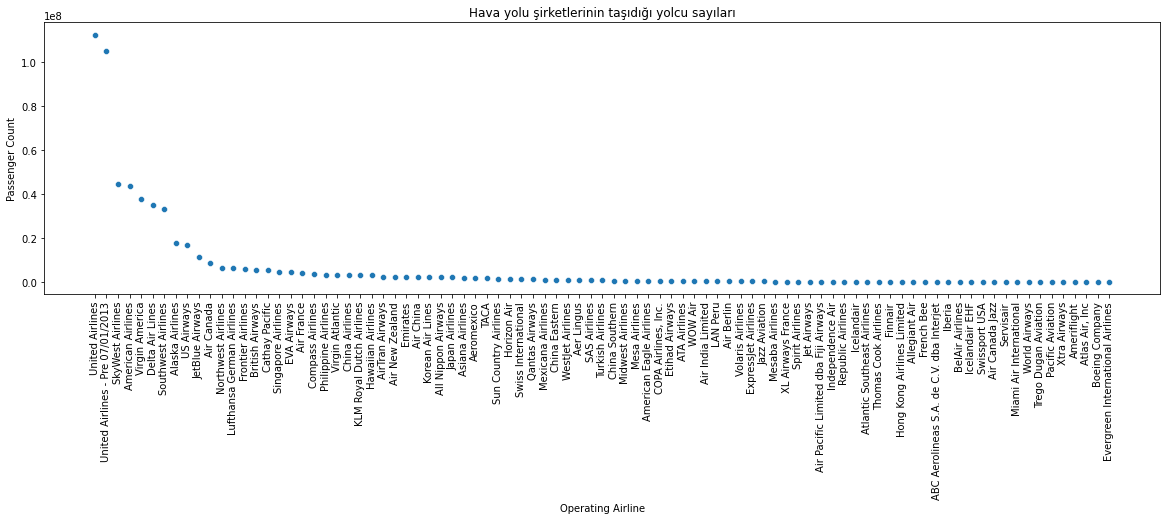

In [57]:
plt.figure(figsize=(20,5))
sns.scatterplot(x="Operating Airline",y="Passenger Count",data=list_group)
plt.xticks(rotation=90);
plt.title("Hava yolu şirketlerinin taşıdığı yolcu sayıları")

In [58]:
passengers_for_years=df.groupby(df["Activity Year"]).sum()["Passenger Count"].sort_values(ascending=False)

In [59]:
passengers_for_years

Activity Year
2017    55823712
2016    53103448
2015    50057887
2014    47114631
2013    44945760
2012    44399885
2011    40927786
2010    39253999
2009    37338942
2008    37234678
2007    35554082
2006    33332970
2018    27912505
2005    17222033
Name: Passenger Count, dtype: int64

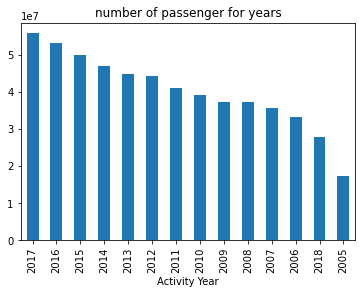

In [62]:
passengers_for_years.plot.bar()
plt.title("number of passenger for years");

In [63]:
x=pd.get_dummies(df,drop_first=True)

In [64]:
all_score=[]
all_clusters=[]
sum_of_squared_distances=[]
predicts=[]
def cluster(clusters):
    for i in np.arange(2,clusters):
        K=KMeans(n_clusters=i)
        K.fit(x)
        predict_kmeans=K.predict(x)
        score=silhouette_score(x,predict_kmeans)
        all_score.append(score)
        all_clusters.append(i)
        sum_of_squared_distances.append(K.inertia_)
        predicts.append(predict_kmeans)
        print(f"cluster={i}, score={score}")       

In [65]:
cluster(10)

cluster=2, score=0.8596461009749851
cluster=3, score=0.8285979403030646
cluster=4, score=0.7861522214334253
cluster=5, score=0.7846343744306895
cluster=6, score=0.6612000020203496
cluster=7, score=0.660335940593202
cluster=8, score=0.6453226795101525
cluster=9, score=0.6405631110557299


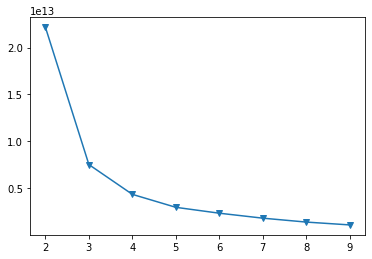

In [66]:
plt.plot(all_clusters,sum_of_squared_distances,marker="v")

In [67]:
# After 5nd  group starting to down

In [79]:
x

,Passenger Count,Activity Month,Activity Year,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,...,Terminal_Terminal 1,Terminal_Terminal 2,Terminal_Terminal 3,Boarding Area_B,Boarding Area_C,Boarding Area_D,Boarding Area_E,Boarding Area_F,Boarding Area_G,Boarding Area_Other
0,27271,7,2005,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,29131,7,2005,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,5415,7,2005,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,35156,7,2005,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,34090,7,2005,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,50,6,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18881,10868,6,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18882,11664,6,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18883,804,6,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
x.rename(columns={'Activity Year':'Years'}, inplace=True)
x.rename(columns={'Passenger Count':'Passenger'}, inplace=True)

In [85]:
x

,Passenger,Activity Month,Years,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,...,Terminal_Terminal 1,Terminal_Terminal 2,Terminal_Terminal 3,Boarding Area_B,Boarding Area_C,Boarding Area_D,Boarding Area_E,Boarding Area_F,Boarding Area_G,Boarding Area_Other
0,27271,7,2005,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,29131,7,2005,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,5415,7,2005,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,35156,7,2005,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,34090,7,2005,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,50,6,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18881,10868,6,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18882,11664,6,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18883,804,6,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


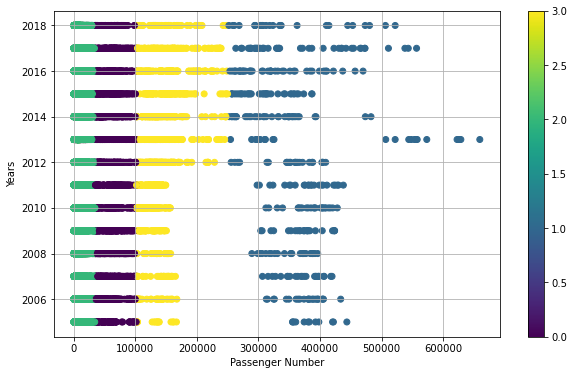

In [88]:
plt.figure(figsize=(10,6))
plt.scatter(x.Passenger,x.Years,c=predicts[2])
plt.xlabel('Passenger Number')
plt.ylabel('Years')
plt.colorbar()
plt.grid()